In [1]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# # pwd
# os.chdir('..')
# all_df = pd.read_csv('/Users/cta/Documents/GitHub/Multi_Agents_Area_Exploration/data/all_data.csv')

cwd = os.getcwd()
root_directory = os.path.dirname(os.getcwd())

In [3]:
# check the data for NaN values or other errors
all_df = pd.read_csv(f"{root_directory}/data/all_data.csv")
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78912 entries, 0 to 78911
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      78912 non-null  int64  
 1   area_percent    78912 non-null  float64
 2   update_time     78912 non-null  float64
 3   delta_time      78912 non-null  float64
 4   plan_length     78912 non-null  int64  
 5   replan_count    78912 non-null  int64  
 6   logging_time    78912 non-null  float64
 7   frame_count     78912 non-null  int64  
 8   known_area      78912 non-null  int64  
 9   seed            78912 non-null  int64  
 10  draw_sim        78912 non-null  bool   
 11  log_plots       78912 non-null  bool   
 12  use_threads     78912 non-null  bool   
 13  n_bots          78912 non-null  int64  
 14  grid_thickness  78912 non-null  int64  
 15  screen_width    78912 non-null  int64  
 16  screen_height   78912 non-null  int64  
 17  min_room_size   78912 non-null 

In [4]:
pd.options.mode.chained_assignment = None

In [5]:
all_df['method'].unique()

array(['Frontier_Random', 'Frontier_Closest', 'Unknown_Random',
       'Unknown_Closest', 'Voronoi_Frontier_Random',
       'Voronoi_Frontier_Closest', 'Voronoi_Frontier_Help_Closest',
       'Voronoi_Frontier_Help_Random', 'Decision_Frontier_Closest',
       'Decay_Epsilon_Greedy_Unknown', 'Decay_Epsilon_Greedy_Frontier',
       'Epsilon_Greedy_Unknown', 'Epsilon_Greedy_Frontier'], dtype=object)

In [6]:
# list all col with Nan
all_df.columns[all_df.isna().any()].tolist()
# remove the cols with Nan
all_df_no_epsilon = all_df.dropna(axis=1)
all_df = all_df_no_epsilon

In [7]:
# drop start_scenario, goal_scenario
all_df_no_epsilon = all_df_no_epsilon.drop(columns=['start_scenario', 'goal_scenario'])


In [8]:
# create a average dataframe on the method
# 
test = pd.DataFrame(all_df_no_epsilon.groupby(['method','frame_count'])['area_percent'].mean())
test = test.reset_index()
test.shape
# convert to numpy array
test_np = test.to_numpy()
test_np

array([['Decay_Epsilon_Greedy_Frontier', 0, 0.14183333333333334],
       ['Decay_Epsilon_Greedy_Frontier', 1, 0.1784375],
       ['Decay_Epsilon_Greedy_Frontier', 2, 0.20029166666666667],
       ...,
       ['Voronoi_Frontier_Random', 542, 0.999375],
       ['Voronoi_Frontier_Random', 543, 0.999375],
       ['Voronoi_Frontier_Random', 544, 1.0]], dtype=object)

In [9]:
# plot using seaborn
# sns.lineplot(data=test, x="frame_count", y="area_percent" )

In [10]:
all_df.head()

,Unnamed: 0,area_percent,update_time,delta_time,plan_length,replan_count,logging_time,frame_count,known_area,seed,...,grid_thickness,screen_width,screen_height,min_room_size,max_room_size,wall_ratio,method,start_scenario,goal_scenario,experiment_ID
0,0,0.151250,0.007633,0.007675,75,5,0.000000,0,242,40,...,10,400,400,100,200,0.160625,Frontier_Random,Rand_Start_Position,Rand_Start_Goal,0
1,1,0.196250,0.006630,0.014357,72,6,0.000028,1,314,40,...,10,400,400,100,200,0.160625,Frontier_Random,Rand_Start_Position,Rand_Start_Goal,0
2,2,0.226875,0.006112,0.020510,68,6,0.000035,2,363,40,...,10,400,400,100,200,0.160625,Frontier_Random,Rand_Start_Position,Rand_Start_Goal,0
3,3,0.251250,0.006872,0.027426,67,7,0.000026,3,402,40,...,10,400,400,100,200,0.160625,Frontier_Random,Rand_Start_Position,Rand_Start_Goal,0
4,4,0.270625,0.005880,0.033358,63,7,0.000030,4,433,40,...,10,400,400,100,200,0.160625,Frontier_Random,Rand_Start_Position,Rand_Start_Goal,0


In [11]:
# all_df.groupby('method').get_group('Frontier_Random')['delta_time'].hist()
# all_df.groupby('method').get_group('Epsilon_Greedy_Frontier')['delta_time'].hist()

# sns hist of delta_time
# sns.histplot(data=all_df_no_epsilon, x="delta_time", hue="method", bins=100)



In [12]:
all_df['method']

0                Frontier_Random
1                Frontier_Random
2                Frontier_Random
3                Frontier_Random
4                Frontier_Random
                  ...           
78907    Epsilon_Greedy_Frontier
78908    Epsilon_Greedy_Frontier
78909    Epsilon_Greedy_Frontier
78910    Epsilon_Greedy_Frontier
78911    Epsilon_Greedy_Frontier
Name: method, Length: 78912, dtype: object

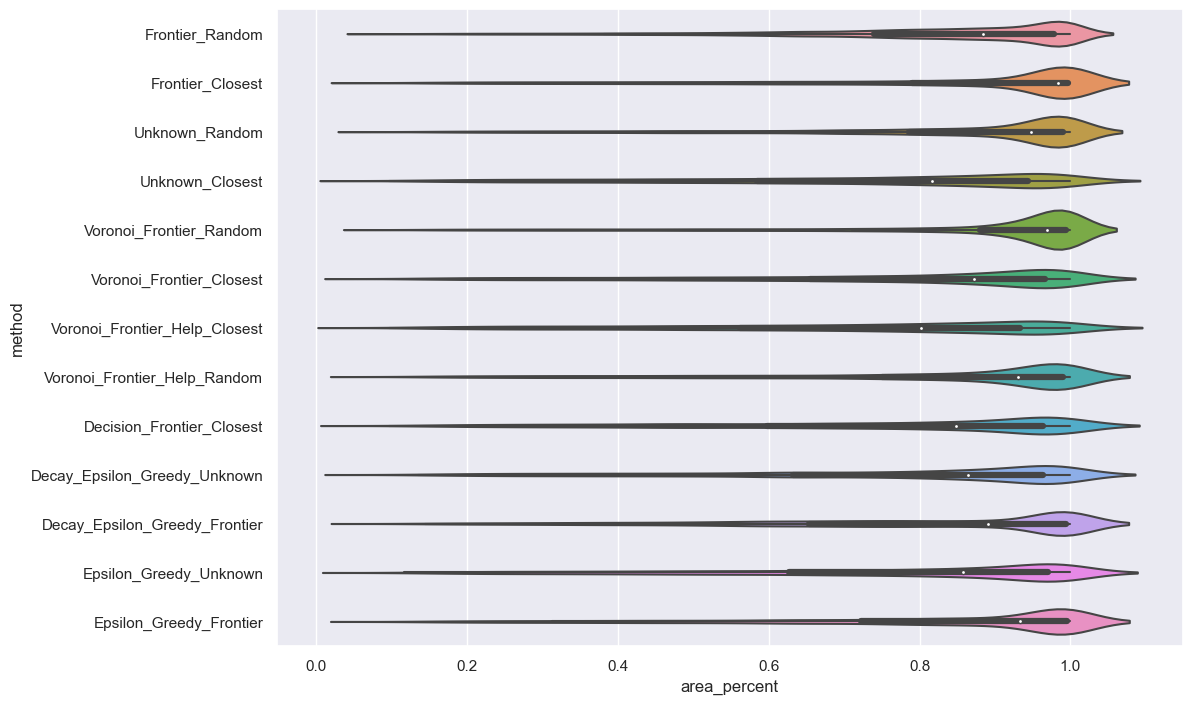

In [13]:
# sns plot of area_percent
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.violinplot(x="area_percent", y="method", data=all_df)

<AxesSubplot:xlabel='area_percent', ylabel='method'>

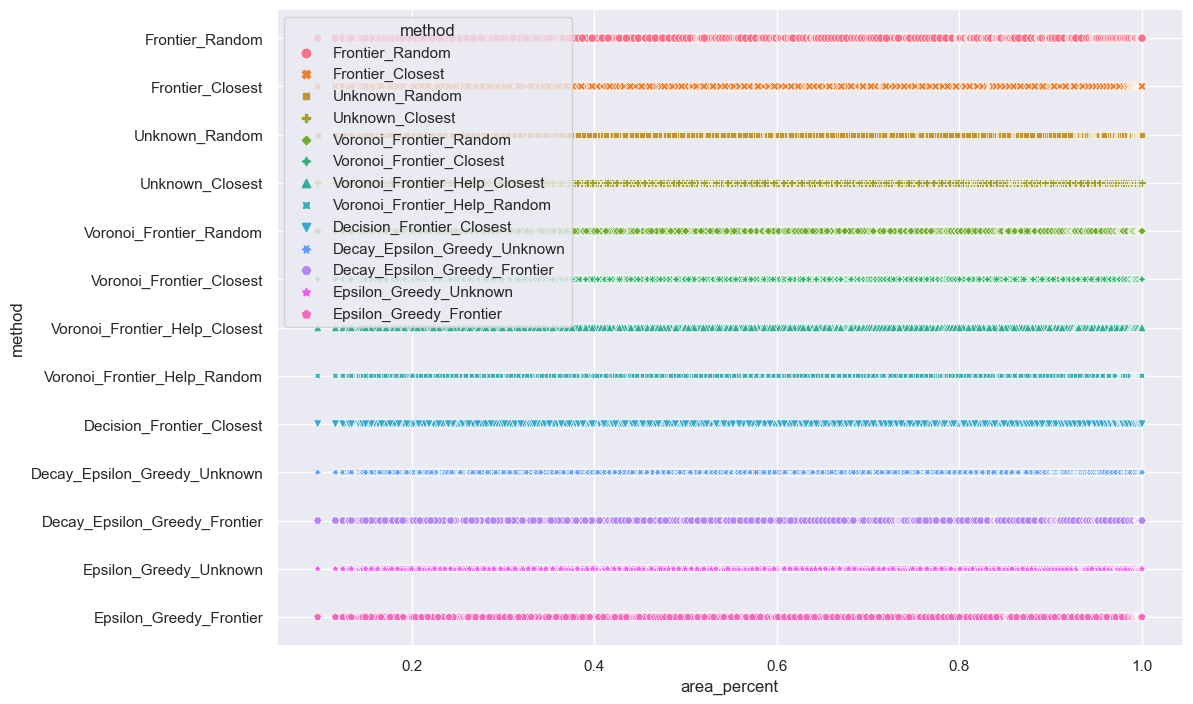

In [14]:
# plot of area_percent
sns.scatterplot(data=all_df, x="area_percent", y="method", hue="method", style="method")

<AxesSubplot:xlabel='frame_count', ylabel='area_percent'>

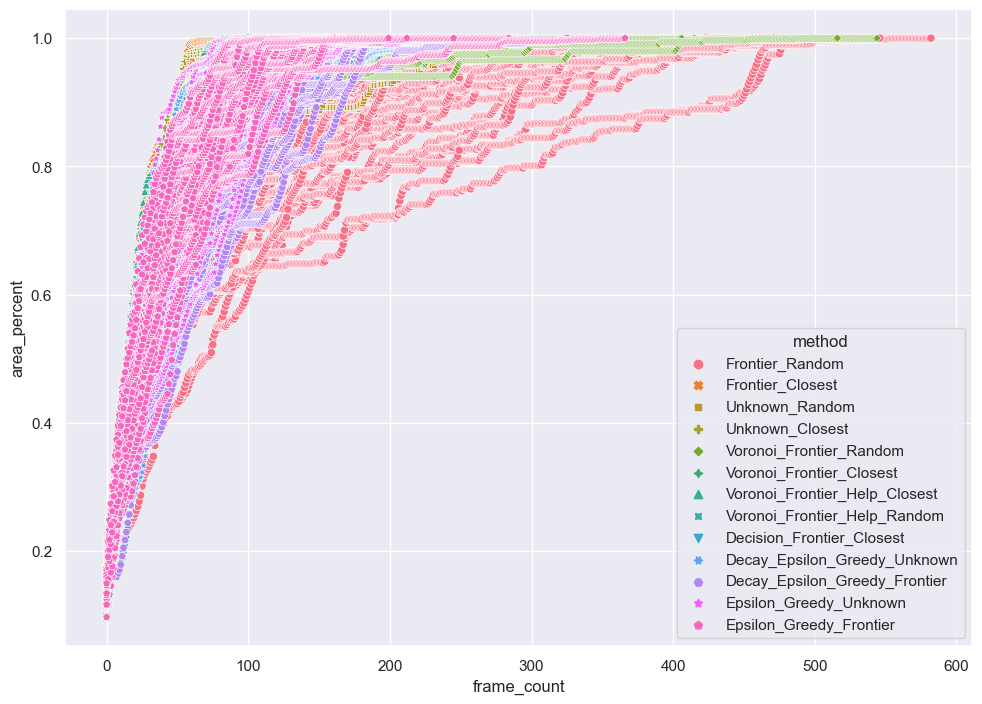

In [15]:
# y axis is the area_percent and the x axis is the frame_count, and the hue is the method
sns.scatterplot(data=all_df, x="frame_count", y="area_percent", hue="method", style="method")

('Decay_Epsilon_Greedy_Frontier',)   355
('Decay_Epsilon_Greedy_Unknown',)   222
('Decision_Frontier_Closest',)   218
('Epsilon_Greedy_Frontier',)   367
('Epsilon_Greedy_Unknown',)   210
('Frontier_Closest',)   292
('Frontier_Random',)   583
('Unknown_Closest',)   179
('Unknown_Random',)   373
('Voronoi_Frontier_Closest',)   205
('Voronoi_Frontier_Help_Closest',)   174
('Voronoi_Frontier_Help_Random',)   266
('Voronoi_Frontier_Random',)   545


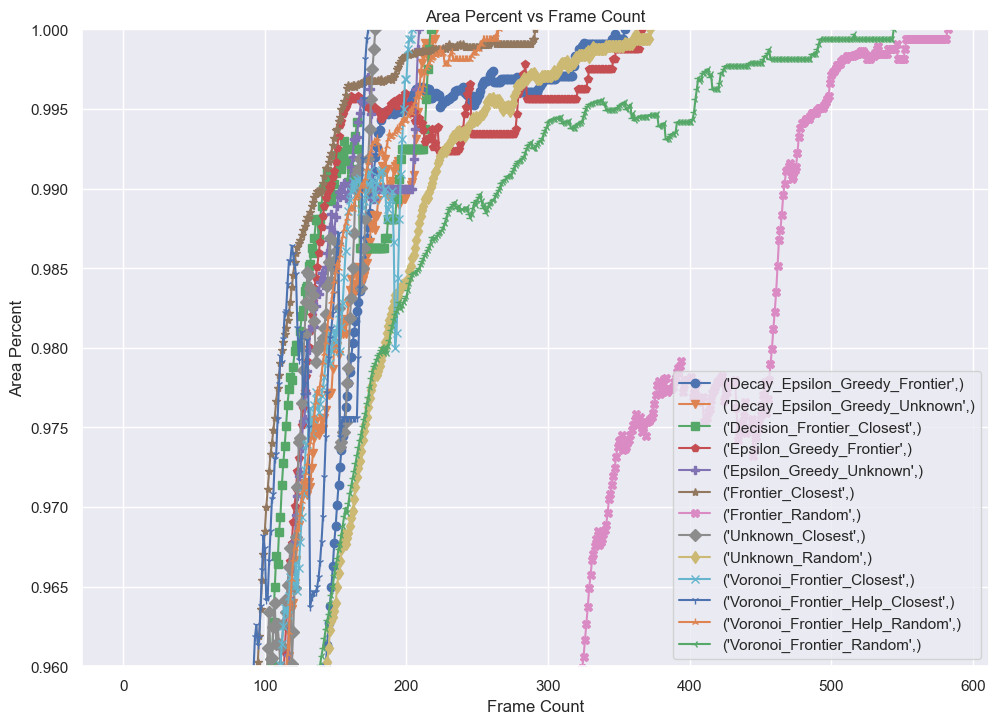

In [16]:
# create a unique marker for each method
markers = ['o', 'v', 's', 'p', 'P', '*', 'X', 'D', 'd', 'x', '1', '2', '3', '4', '8', 'h', 'H', '+', 'x', 'D', 'd', '|', '_']


for i,[method, group] in enumerate(all_df.groupby(['method'])):

    # group by 'frame_count' column
    count_group = group.groupby(['frame_count'])

    # plot mean of 'area_percent' against 'frame_count'
    # plt.plot( count_group['area_percent'].mean(), label=method, marker=markers[i])
    x_data =count_group['area_percent'].mean()
    # x_data[-1]
    print(method," ", len(x_data))
    # uniformy sample 1000 data points
    # x_data =count_group['area_percent'].mean().sample(n=1000, replace=True).sort_values()
    plt.plot( x_data, label=method, marker=markers[i])

plt.legend()

# set y range
plt.ylim(0.96, 1)
# make x axis log scale

# label the x axis
plt.xlabel('Frame Count')
# label the y axis
plt.ylabel('Area Percent')

# set the title
plt.title('Area Percent vs Frame Count')
# save the figure
plt.savefig(f"{root_directory}/data_analysis/plots/area_percent_vs_frame_count.png", dpi=300)

In [17]:
# The average frame_count for each method
all_df.groupby(['method']).max()['frame_count'].sort_values()

method
Voronoi_Frontier_Help_Closest    173
Unknown_Closest                  178
Voronoi_Frontier_Closest         204
Epsilon_Greedy_Unknown           209
Decision_Frontier_Closest        217
Decay_Epsilon_Greedy_Unknown     221
Voronoi_Frontier_Help_Random     265
Frontier_Closest                 291
Decay_Epsilon_Greedy_Frontier    354
Epsilon_Greedy_Frontier          366
Unknown_Random                   372
Voronoi_Frontier_Random          544
Frontier_Random                  582
Name: frame_count, dtype: int64

In [18]:
all_df.groupby(['method'])['delta_time'].max()

method
Decay_Epsilon_Greedy_Frontier    3.460956
Decay_Epsilon_Greedy_Unknown     3.667329
Decision_Frontier_Closest        2.972123
Epsilon_Greedy_Frontier          3.171484
Epsilon_Greedy_Unknown           2.917204
Frontier_Closest                 2.514944
Frontier_Random                  5.293535
Unknown_Closest                  3.951624
Unknown_Random                   3.800302
Voronoi_Frontier_Closest         3.511255
Voronoi_Frontier_Help_Closest    3.738763
Voronoi_Frontier_Help_Random     2.760180
Voronoi_Frontier_Random          4.147806
Name: delta_time, dtype: float64

In [19]:
all_df.groupby(['method']).agg({'delta_time': np.ptp})

,delta_time
method,
Decay_Epsilon_Greedy_Frontier,3.455648
Decay_Epsilon_Greedy_Unknown,3.661890
Decision_Frontier_Closest,2.966749
Epsilon_Greedy_Frontier,3.166241
Epsilon_Greedy_Unknown,2.911961
Frontier_Closest,2.509455
Frontier_Random,5.288145
Unknown_Closest,3.946152
Unknown_Random,3.794960


In [20]:
# The average completion time for each method
x= all_df.groupby(['method'])['delta_time'].get_group('Frontier_Random')
# x.plot()
dx= x.diff()

indices= np.where((dx.shift() < 0) & (dx > 0))
indices

(array([  435,   907,  1490,  1869,  2403,  2843,  3238,  3607,  4002,
         4525,  4888,  5294,  5841,  6286,  6688,  6997,  7522,  7955,
         8409,  8745,  8997,  9407,  9683, 10036, 10402, 10924, 11348,
        11657, 12181]),)

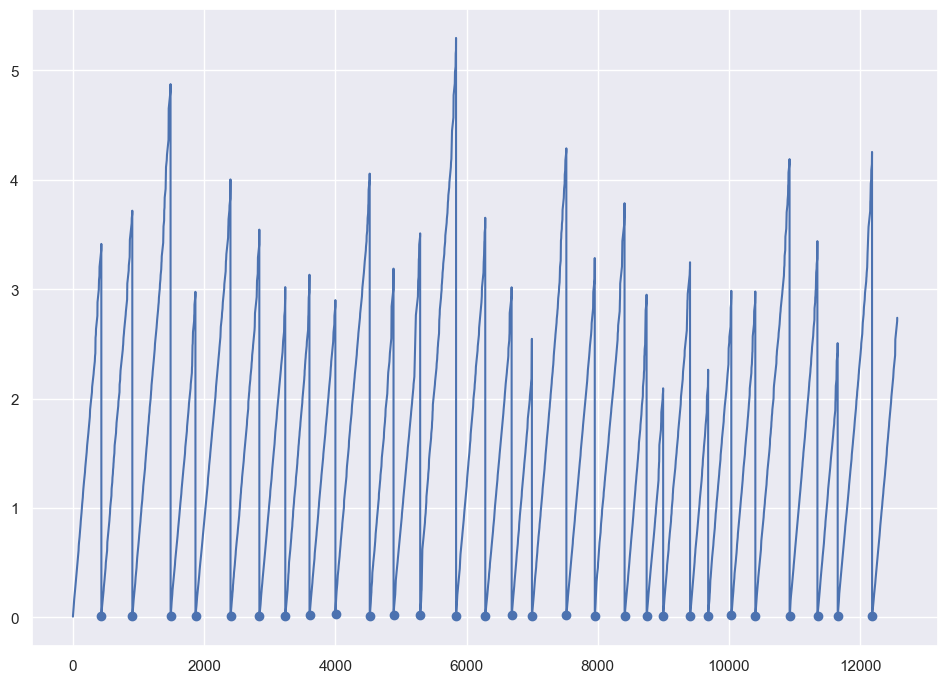

In [21]:
plt.scatter(indices,x.iloc[indices])
plt.plot(x)

OptionError: "No such keys(s): 'mode.use_inf_as_null'"

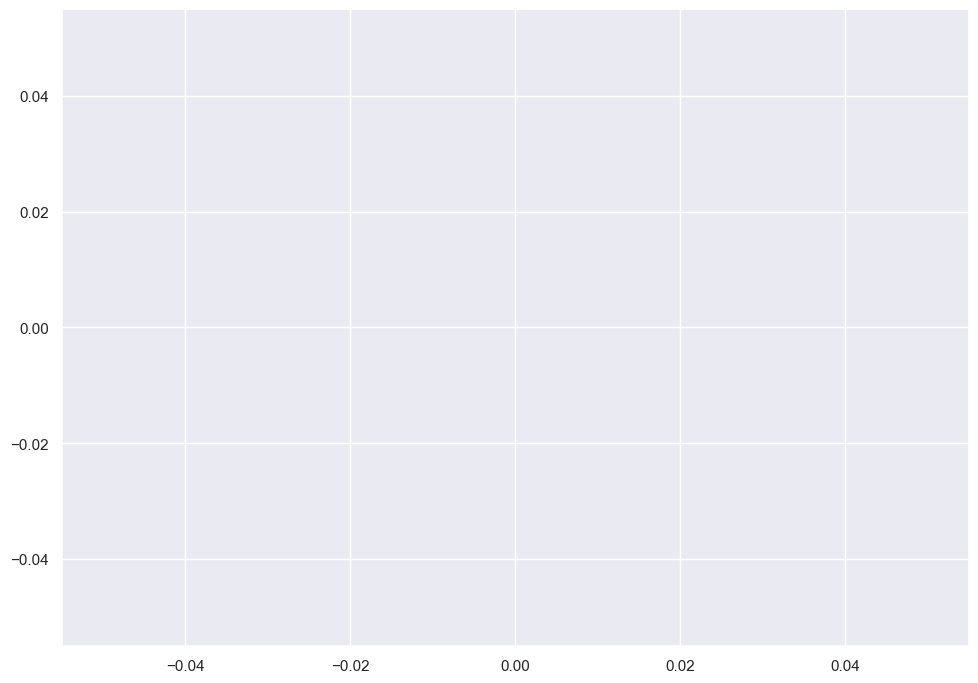

In [29]:
# all_df.groupby(['method'])
for i,[method, group] in enumerate(all_df.groupby(['method'])):
    # group by 'frame_count' column
    count_group = group.groupby(['frame_count'])
    # plot mean of 'area_percent' against 'frame_count'
    # plt.plot( count_group['delta_time'].mean(), label=method, marker=markers[i])
    # plt.plot( np.arange(0, len(count_group['delta_time'])), count_group['delta_time'], label=method, marker=markers[i])
    sns.lineplot(data=group, x="frame_count", y="delta_time",err_style="bars", ci=68)

plt.legend()



In [47]:
all_df['experiment_ID'].unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [46]:
# all_df.groupby(['method','experiment_ID'])
for i,[method, group] in enumerate(all_df.groupby(['method', 'experiment_ID'])):
    print("i: ", i, "method: ", method, "group: ", group.shape)
    # group by 'frame_count' column
    count_group = group.groupby(['frame_count'])
    # plot mean of 'area_percent' against 'frame_count' 
    # plt.plot( count_group['delta_time'].mean(), label=method, marker=markers[i])

i:  0 method:  ('Decay_Epsilon_Greedy_Frontier', 300) group:  (215, 24)
i:  1 method:  ('Decay_Epsilon_Greedy_Frontier', 301) group:  (185, 24)
i:  2 method:  ('Decay_Epsilon_Greedy_Frontier', 302) group:  (279, 24)
i:  3 method:  ('Decay_Epsilon_Greedy_Frontier', 303) group:  (197, 24)
i:  4 method:  ('Decay_Epsilon_Greedy_Frontier', 304) group:  (212, 24)
i:  5 method:  ('Decay_Epsilon_Greedy_Frontier', 305) group:  (262, 24)
i:  6 method:  ('Decay_Epsilon_Greedy_Frontier', 306) group:  (223, 24)
i:  7 method:  ('Decay_Epsilon_Greedy_Frontier', 307) group:  (222, 24)
i:  8 method:  ('Decay_Epsilon_Greedy_Frontier', 308) group:  (205, 24)
i:  9 method:  ('Decay_Epsilon_Greedy_Frontier', 309) group:  (217, 24)
i:  10 method:  ('Decay_Epsilon_Greedy_Frontier', 310) group:  (243, 24)
i:  11 method:  ('Decay_Epsilon_Greedy_Frontier', 311) group:  (248, 24)
i:  12 method:  ('Decay_Epsilon_Greedy_Frontier', 312) group:  (348, 24)
i:  13 method:  ('Decay_Epsilon_Greedy_Frontier', 313) group: